In [1]:
import cv2 as cv 
import numpy as np
import scipy
import PIL.Image
import math
import caffe
import time

import matplotlib
%matplotlib inline
import pylab as plt
import sys
sys.path.append('../../practice_demo')

In [2]:
import mxnet as mx

In [3]:
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = 2 * a + b

e = c.bind(mx.cpu(), {'a': mx.nd.array([1,2]), 'b':mx.nd.array([2,3])})
y = e.forward()
y


[<NDArray 2 @cpu(0)>]

In [4]:
y[0].asnumpy()

array([ 4.,  7.], dtype=float32)

In [15]:
def mxnetModule():

    data = mx.symbol.Variable(name='data')
    ## heat map of human parts
    heatmaplabel = mx.sym.Variable("heatmaplabel")
    ## part affinity graph
    partaffinityglabel = mx.sym.Variable('partaffinityglabel')

    heatweight = mx.sym.Variable('heatweight')
    
    vecweight = mx.sym.Variable('vecweight')
    
    conv1_1 = mx.symbol.Convolution(name='conv1_1', data=data , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_1 = mx.symbol.Activation(name='relu1_1', data=conv1_1 , act_type='relu')
    conv1_2 = mx.symbol.Convolution(name='conv1_2', data=relu1_1 , num_filter=64, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu1_2 = mx.symbol.Activation(name='relu1_2', data=conv1_2 , act_type='relu')
    pool1_stage1 = mx.symbol.Pooling(name='pool1_stage1', data=relu1_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv2_1 = mx.symbol.Convolution(name='conv2_1', data=pool1_stage1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_1 = mx.symbol.Activation(name='relu2_1', data=conv2_1 , act_type='relu')
    conv2_2 = mx.symbol.Convolution(name='conv2_2', data=relu2_1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu2_2 = mx.symbol.Activation(name='relu2_2', data=conv2_2 , act_type='relu')
    pool2_stage1 = mx.symbol.Pooling(name='pool2_stage1', data=relu2_2 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv3_1 = mx.symbol.Convolution(name='conv3_1', data=pool2_stage1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_1 = mx.symbol.Activation(name='relu3_1', data=conv3_1 , act_type='relu')
    conv3_2 = mx.symbol.Convolution(name='conv3_2', data=relu3_1 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_2 = mx.symbol.Activation(name='relu3_2', data=conv3_2 , act_type='relu')
    conv3_3 = mx.symbol.Convolution(name='conv3_3', data=relu3_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_3 = mx.symbol.Activation(name='relu3_3', data=conv3_3 , act_type='relu')
    conv3_4 = mx.symbol.Convolution(name='conv3_4', data=relu3_3 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu3_4 = mx.symbol.Activation(name='relu3_4', data=conv3_4 , act_type='relu')
    pool3_stage1 = mx.symbol.Pooling(name='pool3_stage1', data=relu3_4 , pooling_convention='full', pad=(0,0), kernel=(2,2), stride=(2,2), pool_type='max')
    conv4_1 = mx.symbol.Convolution(name='conv4_1', data=pool3_stage1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_1 = mx.symbol.Activation(name='relu4_1', data=conv4_1 , act_type='relu')
    conv4_2 = mx.symbol.Convolution(name='conv4_2', data=relu4_1 , num_filter=512, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_2 = mx.symbol.Activation(name='relu4_2', data=conv4_2 , act_type='relu')
    conv4_3_CPM = mx.symbol.Convolution(name='conv4_3_CPM', data=relu4_2 , num_filter=256, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_3_CPM = mx.symbol.Activation(name='relu4_3_CPM', data=conv4_3_CPM , act_type='relu')
    conv4_4_CPM = mx.symbol.Convolution(name='conv4_4_CPM', data=relu4_3_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu4_4_CPM = mx.symbol.Activation(name='relu4_4_CPM', data=conv4_4_CPM , act_type='relu')
    conv5_1_CPM_L1 = mx.symbol.Convolution(name='conv5_1_CPM_L1', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L1 = mx.symbol.Activation(name='relu5_1_CPM_L1', data=conv5_1_CPM_L1 , act_type='relu')
    conv5_1_CPM_L2 = mx.symbol.Convolution(name='conv5_1_CPM_L2', data=relu4_4_CPM , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_1_CPM_L2 = mx.symbol.Activation(name='relu5_1_CPM_L2', data=conv5_1_CPM_L2 , act_type='relu')
    conv5_2_CPM_L1 = mx.symbol.Convolution(name='conv5_2_CPM_L1', data=relu5_1_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L1 = mx.symbol.Activation(name='relu5_2_CPM_L1', data=conv5_2_CPM_L1 , act_type='relu')
    conv5_2_CPM_L2 = mx.symbol.Convolution(name='conv5_2_CPM_L2', data=relu5_1_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_2_CPM_L2 = mx.symbol.Activation(name='relu5_2_CPM_L2', data=conv5_2_CPM_L2 , act_type='relu')
    conv5_3_CPM_L1 = mx.symbol.Convolution(name='conv5_3_CPM_L1', data=relu5_2_CPM_L1 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L1 = mx.symbol.Activation(name='relu5_3_CPM_L1', data=conv5_3_CPM_L1 , act_type='relu')
    conv5_3_CPM_L2 = mx.symbol.Convolution(name='conv5_3_CPM_L2', data=relu5_2_CPM_L2 , num_filter=128, pad=(1,1), kernel=(3,3), stride=(1,1), no_bias=False)
    relu5_3_CPM_L2 = mx.symbol.Activation(name='relu5_3_CPM_L2', data=conv5_3_CPM_L2 , act_type='relu')
    conv5_4_CPM_L1 = mx.symbol.Convolution(name='conv5_4_CPM_L1', data=relu5_3_CPM_L1 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L1 = mx.symbol.Activation(name='relu5_4_CPM_L1', data=conv5_4_CPM_L1 , act_type='relu')
    conv5_4_CPM_L2 = mx.symbol.Convolution(name='conv5_4_CPM_L2', data=relu5_3_CPM_L2 , num_filter=512, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    relu5_4_CPM_L2 = mx.symbol.Activation(name='relu5_4_CPM_L2', data=conv5_4_CPM_L2 , act_type='relu')
    conv5_5_CPM_L1 = mx.symbol.Convolution(name='conv5_5_CPM_L1', data=relu5_4_CPM_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    conv5_5_CPM_L2 = mx.symbol.Convolution(name='conv5_5_CPM_L2', data=relu5_4_CPM_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    concat_stage2 = mx.symbol.Concat(name='concat_stage2', *[conv5_5_CPM_L1,conv5_5_CPM_L2,relu4_4_CPM] )
    Mconv1_stage2_L1 = mx.symbol.Convolution(name='Mconv1_stage2_L1', data=concat_stage2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage2_L1 = mx.symbol.Activation(name='Mrelu1_stage2_L1', data=Mconv1_stage2_L1 , act_type='relu')
    Mconv1_stage2_L2 = mx.symbol.Convolution(name='Mconv1_stage2_L2', data=concat_stage2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage2_L2 = mx.symbol.Activation(name='Mrelu1_stage2_L2', data=Mconv1_stage2_L2 , act_type='relu')
    Mconv2_stage2_L1 = mx.symbol.Convolution(name='Mconv2_stage2_L1', data=Mrelu1_stage2_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage2_L1 = mx.symbol.Activation(name='Mrelu2_stage2_L1', data=Mconv2_stage2_L1 , act_type='relu')
    Mconv2_stage2_L2 = mx.symbol.Convolution(name='Mconv2_stage2_L2', data=Mrelu1_stage2_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage2_L2 = mx.symbol.Activation(name='Mrelu2_stage2_L2', data=Mconv2_stage2_L2 , act_type='relu')
    Mconv3_stage2_L1 = mx.symbol.Convolution(name='Mconv3_stage2_L1', data=Mrelu2_stage2_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage2_L1 = mx.symbol.Activation(name='Mrelu3_stage2_L1', data=Mconv3_stage2_L1 , act_type='relu')
    Mconv3_stage2_L2 = mx.symbol.Convolution(name='Mconv3_stage2_L2', data=Mrelu2_stage2_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage2_L2 = mx.symbol.Activation(name='Mrelu3_stage2_L2', data=Mconv3_stage2_L2 , act_type='relu')
    Mconv4_stage2_L1 = mx.symbol.Convolution(name='Mconv4_stage2_L1', data=Mrelu3_stage2_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage2_L1 = mx.symbol.Activation(name='Mrelu4_stage2_L1', data=Mconv4_stage2_L1 , act_type='relu')
    Mconv4_stage2_L2 = mx.symbol.Convolution(name='Mconv4_stage2_L2', data=Mrelu3_stage2_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage2_L2 = mx.symbol.Activation(name='Mrelu4_stage2_L2', data=Mconv4_stage2_L2 , act_type='relu')
    Mconv5_stage2_L1 = mx.symbol.Convolution(name='Mconv5_stage2_L1', data=Mrelu4_stage2_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage2_L1 = mx.symbol.Activation(name='Mrelu5_stage2_L1', data=Mconv5_stage2_L1 , act_type='relu')
    Mconv5_stage2_L2 = mx.symbol.Convolution(name='Mconv5_stage2_L2', data=Mrelu4_stage2_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage2_L2 = mx.symbol.Activation(name='Mrelu5_stage2_L2', data=Mconv5_stage2_L2 , act_type='relu')
    Mconv6_stage2_L1 = mx.symbol.Convolution(name='Mconv6_stage2_L1', data=Mrelu5_stage2_L1 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage2_L1 = mx.symbol.Activation(name='Mrelu6_stage2_L1', data=Mconv6_stage2_L1 , act_type='relu')
    Mconv6_stage2_L2 = mx.symbol.Convolution(name='Mconv6_stage2_L2', data=Mrelu5_stage2_L2 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage2_L2 = mx.symbol.Activation(name='Mrelu6_stage2_L2', data=Mconv6_stage2_L2 , act_type='relu')
    Mconv7_stage2_L1 = mx.symbol.Convolution(name='Mconv7_stage2_L1', data=Mrelu6_stage2_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mconv7_stage2_L2 = mx.symbol.Convolution(name='Mconv7_stage2_L2', data=Mrelu6_stage2_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    concat_stage3 = mx.symbol.Concat(name='concat_stage3', *[Mconv7_stage2_L1,Mconv7_stage2_L2,relu4_4_CPM] )
    Mconv1_stage3_L1 = mx.symbol.Convolution(name='Mconv1_stage3_L1', data=concat_stage3 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage3_L1 = mx.symbol.Activation(name='Mrelu1_stage3_L1', data=Mconv1_stage3_L1 , act_type='relu')
    Mconv1_stage3_L2 = mx.symbol.Convolution(name='Mconv1_stage3_L2', data=concat_stage3 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage3_L2 = mx.symbol.Activation(name='Mrelu1_stage3_L2', data=Mconv1_stage3_L2 , act_type='relu')
    Mconv2_stage3_L1 = mx.symbol.Convolution(name='Mconv2_stage3_L1', data=Mrelu1_stage3_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage3_L1 = mx.symbol.Activation(name='Mrelu2_stage3_L1', data=Mconv2_stage3_L1 , act_type='relu')
    Mconv2_stage3_L2 = mx.symbol.Convolution(name='Mconv2_stage3_L2', data=Mrelu1_stage3_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage3_L2 = mx.symbol.Activation(name='Mrelu2_stage3_L2', data=Mconv2_stage3_L2 , act_type='relu')
    Mconv3_stage3_L1 = mx.symbol.Convolution(name='Mconv3_stage3_L1', data=Mrelu2_stage3_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage3_L1 = mx.symbol.Activation(name='Mrelu3_stage3_L1', data=Mconv3_stage3_L1 , act_type='relu')
    Mconv3_stage3_L2 = mx.symbol.Convolution(name='Mconv3_stage3_L2', data=Mrelu2_stage3_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage3_L2 = mx.symbol.Activation(name='Mrelu3_stage3_L2', data=Mconv3_stage3_L2 , act_type='relu')
    Mconv4_stage3_L1 = mx.symbol.Convolution(name='Mconv4_stage3_L1', data=Mrelu3_stage3_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage3_L1 = mx.symbol.Activation(name='Mrelu4_stage3_L1', data=Mconv4_stage3_L1 , act_type='relu')
    Mconv4_stage3_L2 = mx.symbol.Convolution(name='Mconv4_stage3_L2', data=Mrelu3_stage3_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage3_L2 = mx.symbol.Activation(name='Mrelu4_stage3_L2', data=Mconv4_stage3_L2 , act_type='relu')
    Mconv5_stage3_L1 = mx.symbol.Convolution(name='Mconv5_stage3_L1', data=Mrelu4_stage3_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage3_L1 = mx.symbol.Activation(name='Mrelu5_stage3_L1', data=Mconv5_stage3_L1 , act_type='relu')
    Mconv5_stage3_L2 = mx.symbol.Convolution(name='Mconv5_stage3_L2', data=Mrelu4_stage3_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage3_L2 = mx.symbol.Activation(name='Mrelu5_stage3_L2', data=Mconv5_stage3_L2 , act_type='relu')
    Mconv6_stage3_L1 = mx.symbol.Convolution(name='Mconv6_stage3_L1', data=Mrelu5_stage3_L1 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage3_L1 = mx.symbol.Activation(name='Mrelu6_stage3_L1', data=Mconv6_stage3_L1 , act_type='relu')
    Mconv6_stage3_L2 = mx.symbol.Convolution(name='Mconv6_stage3_L2', data=Mrelu5_stage3_L2 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage3_L2 = mx.symbol.Activation(name='Mrelu6_stage3_L2', data=Mconv6_stage3_L2 , act_type='relu')
    Mconv7_stage3_L1 = mx.symbol.Convolution(name='Mconv7_stage3_L1', data=Mrelu6_stage3_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mconv7_stage3_L2 = mx.symbol.Convolution(name='Mconv7_stage3_L2', data=Mrelu6_stage3_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    concat_stage4 = mx.symbol.Concat(name='concat_stage4', *[Mconv7_stage3_L1,Mconv7_stage3_L2,relu4_4_CPM] )
    Mconv1_stage4_L1 = mx.symbol.Convolution(name='Mconv1_stage4_L1', data=concat_stage4 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage4_L1 = mx.symbol.Activation(name='Mrelu1_stage4_L1', data=Mconv1_stage4_L1 , act_type='relu')
    Mconv1_stage4_L2 = mx.symbol.Convolution(name='Mconv1_stage4_L2', data=concat_stage4 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage4_L2 = mx.symbol.Activation(name='Mrelu1_stage4_L2', data=Mconv1_stage4_L2 , act_type='relu')
    Mconv2_stage4_L1 = mx.symbol.Convolution(name='Mconv2_stage4_L1', data=Mrelu1_stage4_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage4_L1 = mx.symbol.Activation(name='Mrelu2_stage4_L1', data=Mconv2_stage4_L1 , act_type='relu')
    Mconv2_stage4_L2 = mx.symbol.Convolution(name='Mconv2_stage4_L2', data=Mrelu1_stage4_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage4_L2 = mx.symbol.Activation(name='Mrelu2_stage4_L2', data=Mconv2_stage4_L2 , act_type='relu')
    Mconv3_stage4_L1 = mx.symbol.Convolution(name='Mconv3_stage4_L1', data=Mrelu2_stage4_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage4_L1 = mx.symbol.Activation(name='Mrelu3_stage4_L1', data=Mconv3_stage4_L1 , act_type='relu')
    Mconv3_stage4_L2 = mx.symbol.Convolution(name='Mconv3_stage4_L2', data=Mrelu2_stage4_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage4_L2 = mx.symbol.Activation(name='Mrelu3_stage4_L2', data=Mconv3_stage4_L2 , act_type='relu')
    Mconv4_stage4_L1 = mx.symbol.Convolution(name='Mconv4_stage4_L1', data=Mrelu3_stage4_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage4_L1 = mx.symbol.Activation(name='Mrelu4_stage4_L1', data=Mconv4_stage4_L1 , act_type='relu')
    Mconv4_stage4_L2 = mx.symbol.Convolution(name='Mconv4_stage4_L2', data=Mrelu3_stage4_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage4_L2 = mx.symbol.Activation(name='Mrelu4_stage4_L2', data=Mconv4_stage4_L2 , act_type='relu')
    Mconv5_stage4_L1 = mx.symbol.Convolution(name='Mconv5_stage4_L1', data=Mrelu4_stage4_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage4_L1 = mx.symbol.Activation(name='Mrelu5_stage4_L1', data=Mconv5_stage4_L1 , act_type='relu')
    Mconv5_stage4_L2 = mx.symbol.Convolution(name='Mconv5_stage4_L2', data=Mrelu4_stage4_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage4_L2 = mx.symbol.Activation(name='Mrelu5_stage4_L2', data=Mconv5_stage4_L2 , act_type='relu')
    Mconv6_stage4_L1 = mx.symbol.Convolution(name='Mconv6_stage4_L1', data=Mrelu5_stage4_L1 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage4_L1 = mx.symbol.Activation(name='Mrelu6_stage4_L1', data=Mconv6_stage4_L1 , act_type='relu')
    Mconv6_stage4_L2 = mx.symbol.Convolution(name='Mconv6_stage4_L2', data=Mrelu5_stage4_L2 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage4_L2 = mx.symbol.Activation(name='Mrelu6_stage4_L2', data=Mconv6_stage4_L2 , act_type='relu')
    Mconv7_stage4_L1 = mx.symbol.Convolution(name='Mconv7_stage4_L1', data=Mrelu6_stage4_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mconv7_stage4_L2 = mx.symbol.Convolution(name='Mconv7_stage4_L2', data=Mrelu6_stage4_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    concat_stage5 = mx.symbol.Concat(name='concat_stage5', *[Mconv7_stage4_L1,Mconv7_stage4_L2,relu4_4_CPM] )
    Mconv1_stage5_L1 = mx.symbol.Convolution(name='Mconv1_stage5_L1', data=concat_stage5 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage5_L1 = mx.symbol.Activation(name='Mrelu1_stage5_L1', data=Mconv1_stage5_L1 , act_type='relu')
    Mconv1_stage5_L2 = mx.symbol.Convolution(name='Mconv1_stage5_L2', data=concat_stage5 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage5_L2 = mx.symbol.Activation(name='Mrelu1_stage5_L2', data=Mconv1_stage5_L2 , act_type='relu')
    Mconv2_stage5_L1 = mx.symbol.Convolution(name='Mconv2_stage5_L1', data=Mrelu1_stage5_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage5_L1 = mx.symbol.Activation(name='Mrelu2_stage5_L1', data=Mconv2_stage5_L1 , act_type='relu')
    Mconv2_stage5_L2 = mx.symbol.Convolution(name='Mconv2_stage5_L2', data=Mrelu1_stage5_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage5_L2 = mx.symbol.Activation(name='Mrelu2_stage5_L2', data=Mconv2_stage5_L2 , act_type='relu')
    Mconv3_stage5_L1 = mx.symbol.Convolution(name='Mconv3_stage5_L1', data=Mrelu2_stage5_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage5_L1 = mx.symbol.Activation(name='Mrelu3_stage5_L1', data=Mconv3_stage5_L1 , act_type='relu')
    Mconv3_stage5_L2 = mx.symbol.Convolution(name='Mconv3_stage5_L2', data=Mrelu2_stage5_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage5_L2 = mx.symbol.Activation(name='Mrelu3_stage5_L2', data=Mconv3_stage5_L2 , act_type='relu')
    Mconv4_stage5_L1 = mx.symbol.Convolution(name='Mconv4_stage5_L1', data=Mrelu3_stage5_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage5_L1 = mx.symbol.Activation(name='Mrelu4_stage5_L1', data=Mconv4_stage5_L1 , act_type='relu')
    Mconv4_stage5_L2 = mx.symbol.Convolution(name='Mconv4_stage5_L2', data=Mrelu3_stage5_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage5_L2 = mx.symbol.Activation(name='Mrelu4_stage5_L2', data=Mconv4_stage5_L2 , act_type='relu')
    Mconv5_stage5_L1 = mx.symbol.Convolution(name='Mconv5_stage5_L1', data=Mrelu4_stage5_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage5_L1 = mx.symbol.Activation(name='Mrelu5_stage5_L1', data=Mconv5_stage5_L1 , act_type='relu')
    Mconv5_stage5_L2 = mx.symbol.Convolution(name='Mconv5_stage5_L2', data=Mrelu4_stage5_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage5_L2 = mx.symbol.Activation(name='Mrelu5_stage5_L2', data=Mconv5_stage5_L2 , act_type='relu')
    Mconv6_stage5_L1 = mx.symbol.Convolution(name='Mconv6_stage5_L1', data=Mrelu5_stage5_L1 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage5_L1 = mx.symbol.Activation(name='Mrelu6_stage5_L1', data=Mconv6_stage5_L1 , act_type='relu')
    Mconv6_stage5_L2 = mx.symbol.Convolution(name='Mconv6_stage5_L2', data=Mrelu5_stage5_L2 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage5_L2 = mx.symbol.Activation(name='Mrelu6_stage5_L2', data=Mconv6_stage5_L2 , act_type='relu')
    Mconv7_stage5_L1 = mx.symbol.Convolution(name='Mconv7_stage5_L1', data=Mrelu6_stage5_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mconv7_stage5_L2 = mx.symbol.Convolution(name='Mconv7_stage5_L2', data=Mrelu6_stage5_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    concat_stage6 = mx.symbol.Concat(name='concat_stage6', *[Mconv7_stage5_L1,Mconv7_stage5_L2,relu4_4_CPM] )
    Mconv1_stage6_L1 = mx.symbol.Convolution(name='Mconv1_stage6_L1', data=concat_stage6 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage6_L1 = mx.symbol.Activation(name='Mrelu1_stage6_L1', data=Mconv1_stage6_L1 , act_type='relu')
    Mconv1_stage6_L2 = mx.symbol.Convolution(name='Mconv1_stage6_L2', data=concat_stage6 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu1_stage6_L2 = mx.symbol.Activation(name='Mrelu1_stage6_L2', data=Mconv1_stage6_L2 , act_type='relu')
    Mconv2_stage6_L1 = mx.symbol.Convolution(name='Mconv2_stage6_L1', data=Mrelu1_stage6_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage6_L1 = mx.symbol.Activation(name='Mrelu2_stage6_L1', data=Mconv2_stage6_L1 , act_type='relu')
    Mconv2_stage6_L2 = mx.symbol.Convolution(name='Mconv2_stage6_L2', data=Mrelu1_stage6_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu2_stage6_L2 = mx.symbol.Activation(name='Mrelu2_stage6_L2', data=Mconv2_stage6_L2 , act_type='relu')
    Mconv3_stage6_L1 = mx.symbol.Convolution(name='Mconv3_stage6_L1', data=Mrelu2_stage6_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage6_L1 = mx.symbol.Activation(name='Mrelu3_stage6_L1', data=Mconv3_stage6_L1 , act_type='relu')
    Mconv3_stage6_L2 = mx.symbol.Convolution(name='Mconv3_stage6_L2', data=Mrelu2_stage6_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu3_stage6_L2 = mx.symbol.Activation(name='Mrelu3_stage6_L2', data=Mconv3_stage6_L2 , act_type='relu')
    Mconv4_stage6_L1 = mx.symbol.Convolution(name='Mconv4_stage6_L1', data=Mrelu3_stage6_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage6_L1 = mx.symbol.Activation(name='Mrelu4_stage6_L1', data=Mconv4_stage6_L1 , act_type='relu')
    Mconv4_stage6_L2 = mx.symbol.Convolution(name='Mconv4_stage6_L2', data=Mrelu3_stage6_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu4_stage6_L2 = mx.symbol.Activation(name='Mrelu4_stage6_L2', data=Mconv4_stage6_L2 , act_type='relu')
    Mconv5_stage6_L1 = mx.symbol.Convolution(name='Mconv5_stage6_L1', data=Mrelu4_stage6_L1 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage6_L1 = mx.symbol.Activation(name='Mrelu5_stage6_L1', data=Mconv5_stage6_L1 , act_type='relu')
    Mconv5_stage6_L2 = mx.symbol.Convolution(name='Mconv5_stage6_L2', data=Mrelu4_stage6_L2 , num_filter=128, pad=(3,3), kernel=(7,7), stride=(1,1), no_bias=False)
    Mrelu5_stage6_L2 = mx.symbol.Activation(name='Mrelu5_stage6_L2', data=Mconv5_stage6_L2 , act_type='relu')
    Mconv6_stage6_L1 = mx.symbol.Convolution(name='Mconv6_stage6_L1', data=Mrelu5_stage6_L1 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage6_L1 = mx.symbol.Activation(name='Mrelu6_stage6_L1', data=Mconv6_stage6_L1 , act_type='relu')
    Mconv6_stage6_L2 = mx.symbol.Convolution(name='Mconv6_stage6_L2', data=Mrelu5_stage6_L2 , num_filter=128, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mrelu6_stage6_L2 = mx.symbol.Activation(name='Mrelu6_stage6_L2', data=Mconv6_stage6_L2 , act_type='relu')
    Mconv7_stage6_L1 = mx.symbol.Convolution(name='Mconv7_stage6_L1', data=Mrelu6_stage6_L1 , num_filter=38, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)
    Mconv7_stage6_L2 = mx.symbol.Convolution(name='Mconv7_stage6_L2', data=Mrelu6_stage6_L2 , num_filter=19, pad=(0,0), kernel=(1,1), stride=(1,1), no_bias=False)

    conv5_5_CPM_L1r = mx.symbol.Reshape(data=conv5_5_CPM_L1, shape=(-1,), name='conv5_5_CPM_L1r')
    partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage1_loss_L1s = mx.symbol.square(conv5_5_CPM_L1r-partaffinityglabelr)
    vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='conv5_5_CPM_L1w')
    stage1_loss_L1w = stage1_loss_L1s*vecweightw
    stage1_loss_L1  = mx.symbol.MakeLoss(stage1_loss_L1w)
    
    conv5_5_CPM_L2r = mx.symbol.Reshape(data=conv5_5_CPM_L2, shape=(-1,), name='conv5_5_CPM_L2r')
    heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage1_loss_L2s = mx.symbol.square(conv5_5_CPM_L2r-heatmaplabelr)
    heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L2w')
    stage1_loss_L2w = stage1_loss_L2s*heatweightw
    stage1_loss_L2  = mx.symbol.MakeLoss(stage1_loss_L2w)
        
    '''
    stage1_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=conv5_5_CPM_L1, label=partaffinityglabel)
    stage1_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=conv5_5_CPM_L2, label=heatmaplabel)

    stage2_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage2_L1, label=partaffinityglabel)
    stage2_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage2_L2, label=heatmaplabel)
    '''
    
    Mconv7_stage2_L1r = mx.symbol.Reshape(data=Mconv7_stage2_L1, shape=(-1,), name='Mconv7_stage2_L1')
    #partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage2_loss_L1s = mx.symbol.square(Mconv7_stage2_L1r - partaffinityglabelr)
    #vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='Mconv7_stage2_L1r')
    stage2_loss_L1w = stage2_loss_L1s*vecweightw
    stage2_loss_L1  = mx.symbol.MakeLoss(stage2_loss_L1w)
    
    Mconv7_stage2_L2r = mx.symbol.Reshape(data=Mconv7_stage2_L2, shape=(-1,), name='Mconv7_stage2_L2')
    #heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage2_loss_L2s = mx.symbol.square(Mconv7_stage2_L2r-heatmaplabelr)
    #heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L1r')
    stage2_loss_L2w = stage1_loss_L2s*heatweightw
    stage2_loss_L2  = mx.symbol.MakeLoss(stage2_loss_L2w)
    
    
    Mconv7_stage3_L1r = mx.symbol.Reshape(data=Mconv7_stage3_L1, shape=(-1,), name='Mconv7_stage3_L1')
    #partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage3_loss_L1s = mx.symbol.square(Mconv7_stage3_L1r - partaffinityglabelr)
    #vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='Mconv7_stage2_L1r')
    stage3_loss_L1w = stage3_loss_L1s*vecweightw
    stage3_loss_L1  = mx.symbol.MakeLoss(stage3_loss_L1w)
    
    Mconv7_stage3_L2r = mx.symbol.Reshape(data=Mconv7_stage3_L2, shape=(-1,), name='Mconv7_stage3_L2')
    #heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage3_loss_L2s = mx.symbol.square(Mconv7_stage3_L2r-heatmaplabelr)
    #heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L1r')
    stage3_loss_L2w = stage3_loss_L2s*heatweightw
    stage3_loss_L2  = mx.symbol.MakeLoss(stage3_loss_L2w)
    
    Mconv7_stage4_L1r = mx.symbol.Reshape(data=Mconv7_stage4_L1, shape=(-1,), name='Mconv7_stage4_L1')
    #partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage4_loss_L1s = mx.symbol.square(Mconv7_stage4_L1r - partaffinityglabelr)
    #vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='Mconv7_stage2_L1r')
    stage4_loss_L1w = stage4_loss_L1s*vecweightw
    stage4_loss_L1  = mx.symbol.MakeLoss(stage4_loss_L1w)
    
    Mconv7_stage4_L2r = mx.symbol.Reshape(data=Mconv7_stage4_L2, shape=(-1,), name='Mconv7_stage4_L2')
    #heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage4_loss_L2s = mx.symbol.square(Mconv7_stage4_L2r-heatmaplabelr)
    #heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L1r')
    stage4_loss_L2w = stage1_loss_L2s*heatweightw
    stage4_loss_L2  = mx.symbol.MakeLoss(stage4_loss_L2w)
    
    Mconv7_stage5_L1r = mx.symbol.Reshape(data=Mconv7_stage5_L1, shape=(-1,), name='Mconv7_stage5_L1')
    #partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage5_loss_L1s = mx.symbol.square(Mconv7_stage5_L1r - partaffinityglabelr)
    #vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='Mconv7_stage2_L1r')
    stage5_loss_L1w = stage5_loss_L1s*vecweightw
    stage5_loss_L1  = mx.symbol.MakeLoss(stage5_loss_L1w)
    
    Mconv7_stage5_L2r = mx.symbol.Reshape(data=Mconv7_stage5_L2, shape=(-1,), name='Mconv7_stage5_L2')
    #heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage5_loss_L2s = mx.symbol.square(Mconv7_stage5_L2r-heatmaplabelr)
    #heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L1r')
    stage5_loss_L2w = stage5_loss_L2s*heatweightw
    stage5_loss_L2  = mx.symbol.MakeLoss(stage5_loss_L2w)
    
    
    Mconv7_stage6_L1r = mx.symbol.Reshape(data=Mconv7_stage6_L1, shape=(-1,), name='Mconv7_stage3_L1')
    #partaffinityglabelr = mx.symbol.Reshape(data=partaffinityglabel, shape=(-1, ), name='partaffinityglabelr')
    stage6_loss_L1s = mx.symbol.square(Mconv7_stage6_L1r - partaffinityglabelr)
    #vecweightw = mx.symbol.Reshape(data=vecweight, shape=(-1,), name='Mconv7_stage2_L1r')
    stage6_loss_L1w = stage6_loss_L1s*vecweightw
    stage6_loss_L1  = mx.symbol.MakeLoss(stage6_loss_L1w)
    
    Mconv7_stage6_L2r = mx.symbol.Reshape(data=Mconv7_stage6_L2, shape=(-1,), name='Mconv7_stage3_L2')
    #heatmaplabelr = mx.symbol.Reshape(data=heatmaplabel, shape=(-1, ), name='heatmaplabelr')
    stage6_loss_L2s = mx.symbol.square(Mconv7_stage6_L2r-heatmaplabelr)
    #heatweightw = mx.symbol.Reshape(data=heatweight, shape=(-1,), name='conv5_5_CPM_L1r')
    stage6_loss_L2w = stage6_loss_L2s*heatweightw
    stage6_loss_L2  = mx.symbol.MakeLoss(stage6_loss_L2w)
    
    '''
    stage3_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage3_L1, label=partaffinityglabel)
    stage3_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage3_L2, label=heatmaplabel)

    stage4_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage4_L1, label=partaffinityglabel)
    stage4_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage4_L2, label=heatmaplabel)

    stage5_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage5_L1, label=partaffinityglabel)
    stage5_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage5_L2, label=heatmaplabel)

    stage6_loss_L1 = vecweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage6_L1, label=partaffinityglabel)
    stage6_loss_L2 = heatweight*mx.sym.LinearRegressionOutput(data=Mconv7_stage6_L2, label=heatmaplabel)
    '''
    '''
    group = mx.symbol.Group([stage1_loss_L1
                            ,stage1_loss_L2,
                            stage2_loss_L1,stage2_loss_L2,
                            stage3_loss_L1,stage3_loss_L2,
                            stage4_loss_L1,stage4_loss_L2,
                            stage5_loss_L1,stage5_loss_L2,
                            stage6_loss_L1,stage6_loss_L2])
    '''
    group = mx.symbol.Group([stage1_loss_L1, stage1_loss_L2,
                            stage3_loss_L1, stage4_loss_L2,
                            stage5_loss_L1, stage6_loss_L2])
    return group


In [16]:
sym = mxnetModule()

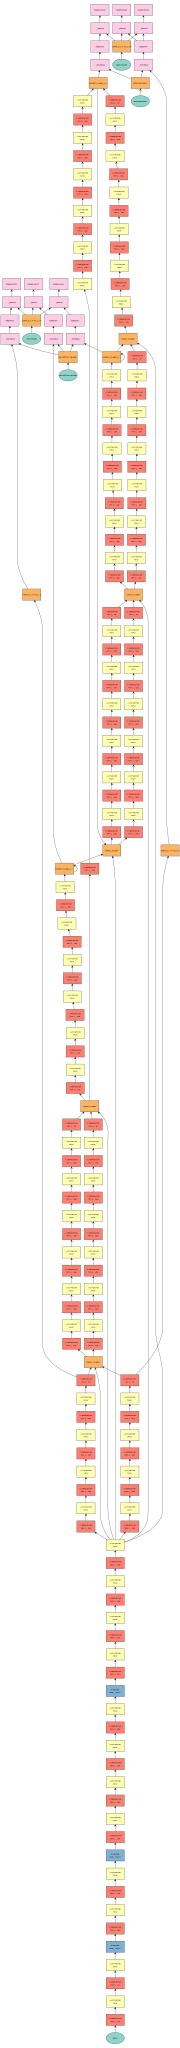

In [17]:
mx.viz.plot_network(symbol=sym)

In [131]:
sym.list_arguments()

['data',
 'conv1_1_weight',
 'conv1_1_bias',
 'conv1_2_weight',
 'conv1_2_bias',
 'conv2_1_weight',
 'conv2_1_bias',
 'conv2_2_weight',
 'conv2_2_bias',
 'conv3_1_weight',
 'conv3_1_bias',
 'conv3_2_weight',
 'conv3_2_bias',
 'conv3_3_weight',
 'conv3_3_bias',
 'conv3_4_weight',
 'conv3_4_bias',
 'conv4_1_weight',
 'conv4_1_bias',
 'conv4_2_weight',
 'conv4_2_bias',
 'conv4_3_CPM_weight',
 'conv4_3_CPM_bias',
 'conv4_4_CPM_weight',
 'conv4_4_CPM_bias',
 'conv5_1_CPM_L1_weight',
 'conv5_1_CPM_L1_bias',
 'conv5_2_CPM_L1_weight',
 'conv5_2_CPM_L1_bias',
 'conv5_3_CPM_L1_weight',
 'conv5_3_CPM_L1_bias',
 'conv5_4_CPM_L1_weight',
 'conv5_4_CPM_L1_bias',
 'conv5_5_CPM_L1_weight',
 'conv5_5_CPM_L1_bias',
 'partaffinityglabel',
 'vecweight',
 'conv5_1_CPM_L2_weight',
 'conv5_1_CPM_L2_bias',
 'conv5_2_CPM_L2_weight',
 'conv5_2_CPM_L2_bias',
 'conv5_3_CPM_L2_weight',
 'conv5_3_CPM_L2_bias',
 'conv5_4_CPM_L2_weight',
 'conv5_4_CPM_L2_bias',
 'conv5_5_CPM_L2_weight',
 'conv5_5_CPM_L2_bias',
 'heat

In [132]:
import json

In [133]:
class DataBatchweight(object):
    def __init__(self, data, heatmaplabel, partaffinityglabel, heatweight, vecweight, pad=0):
        self.data = [data]
        self.label = [heatmaplabel, partaffinityglabel, heatweight, vecweight]
        self.pad = pad


class cocoIterweight:
    def __init__(self, datajson,
                 data_names, data_shapes, label_names,
                 label_shapes):

        self._data_shapes = data_shapes
        self._label_shapes = label_shapes
        self._provide_data = zip([data_names], [data_shapes])
        self._provide_label = zip(label_names, label_shapes) * 6

        with open(datajson, 'r') as f:
            data = json.load(f)

        self.num_batches = len(data)

        self.data = data
        
        self.cur_batch = 0

        self.keys = data.keys()

    def __iter__(self):
        return self

    def reset(self):
        self.cur_batch = 0

    def __next__(self):
        return self.next()

    @property
    def provide_data(self):
        return self._provide_data

    @property
    def provide_label(self):
        return self._provide_label

    def next(self):
        if self.cur_batch < self.num_batches:

            ''' 
            img = coco.loadImgs(self._imgIds[self._trainImageRanges[self.cur_batch]])[0]
            # print(img)
            imagepath = self._trainimagepath + img['file_name']
            # print(imagepath)
            oriImg = cv.imread(imagepath)  # B,G,R order

            # print(oriImg.shape)
            imageToTest = cv.resize(oriImg, (368, 368))

            transposeImage = np.transpose(np.float32(imageToTest), (2, 0, 1)) / 256 - 0.5
            testimage = transposeImage
            '''

            image, heatmap, pagmap = getImageandLabel(self.data[self.keys[self.cur_batch]])
            
            heatweight = np.zeros((1,19,46,46))
            vecweight = np.zeros((1,38,46,46))
            
            transposeImage = np.transpose(np.float32(image), (2,0,1))/256 - 0.5
            
            '''
            heatavg = np.zeros((46,46))
            for i in range(len(heatmap)):
                heatavg = heatavg + heatmap[i]/len(heatmap)
                
            heatmap.append(heatavg)
            '''
            self.cur_batch += 1

            return DataBatchweight(
                mx.nd.array([transposeImage]),
                mx.nd.array([heatmap]),
                mx.nd.array([pagmap]),
                mx.nd.array([heatweight]),
                mx.nd.array([vecweight]))
        else:
            raise StopIteration

In [134]:
sym.infer_shape?

In [135]:
sym.infer_shape(data = (1,3, 368,368),
                heatmaplabel=(1, 19, 46, 46),
               partaffinityglabel=(1,38,46,46),
               heatweight=(1,19,46,46),
               vecweight=(1,38,46,46))

([(1L, 3L, 368L, 368L),
  (64L, 3L, 3L, 3L),
  (64L,),
  (64L, 64L, 3L, 3L),
  (64L,),
  (128L, 64L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (256L, 128L, 3L, 3L),
  (256L,),
  (256L, 256L, 3L, 3L),
  (256L,),
  (256L, 256L, 3L, 3L),
  (256L,),
  (256L, 256L, 3L, 3L),
  (256L,),
  (512L, 256L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (256L, 512L, 3L, 3L),
  (256L,),
  (128L, 256L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (512L, 128L, 1L, 1L),
  (512L,),
  (38L, 512L, 1L, 1L),
  (38L,),
  (1L, 38L, 46L, 46L),
  (1L, 38L, 46L, 46L),
  (128L, 128L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (512L, 128L, 1L, 1L),
  (512L,),
  (19L, 512L, 1L, 1L),
  (19L,),
  (1L, 19L, 46L, 46L),
  (1L, 19L, 46L, 46L)],
 [(80408L,), (40204L,)],
 [])

In [82]:
cocodata = cocoIterweight('pose_io/data.json',
                    'data', (1,3, 368,368),
                    ['heatmaplabel','partaffinityglabel','heatweight','vecweight'],
                    [(1, 19, 46, 46),(1,38,46,46),(1,19,46,46),(1,38,46,46)])

In [83]:
output_prefix = '../realtimePose'
testsym,arg_params, aux_params = mx.model.load_checkpoint(output_prefix, 0)

In [84]:
cmodel = mx.mod.Module(symbol=sym,
                        label_names=['heatmaplabel',
                                    'partaffinityglabel',
                                      'heatweight',
                                      'vecweight'])

In [85]:
cmodel.infer_shape?

Object `cmodel.infer_shape` not found.


In [81]:
cmodel.bind(data_shapes=[('data', (1, 3, 368, 368))])

self._data_shapes:  [DataDesc[data,(1, 3, 368, 368),<type 'numpy.float32'>,NCHW]]
self._label_shapes:  None


../../practice_demo/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['heatmaplabel', 'partaffinityglabel', 'heatweight', 'vecweight'])
  warnings.warn(msg)


In [ ]:
cmodel.infer_

In [39]:
cmodel.init_params(arg_params=arg_params, aux_params=aux_params)

AttributeError: 'NoneType' object has no attribute 'items'

In [29]:
import time
startt = time.time()

cmodel.init_optimizer(optimizer='sgd', 
                      optimizer_params=(('learning_rate', 0.00004), ))

# train one epoch, i.e. going over the data iter one pass
for batch in cocodata:
    cmodel.forward(batch, is_train=True)       # compute predictions
    prediction=cmodel.get_outputs()
    #print prediction
    #print prediction[11].asnumpy().reshape(-1).shape
    #print batch.label[0].asnumpy().reshape(-1).shape
    print '-------------'
    print np.mean((prediction[11].asnumpy().reshape(-1)-batch.label[0].asnumpy().reshape(-1))**2)
    print np.mean((prediction[10].asnumpy().reshape(-1)-batch.label[1].asnumpy().reshape(-1))**2)
    cmodel.backward()                          # compute gradients
    cmodel.update()                            # update parameters using SGD
    
endt = time.time()
print endt-startt

NameError: name 'cmodel' is not defined